In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:16.3f}'.format}, linewidth=130)

In [5]:
def identity(x):
    return x

def relu(x):
    
    # One line return statement is dope!
    return np.where(x > 0, x, 0)

def l_relu(x, a = 0.01):
    
    # One line return statement is dope!
    return np.where(x > 0, x, a*x)

def sine(x):
    
    return np.sin(x)

def cos(x):
    
    return np.cos(x)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1/(1+np.exp(-x))

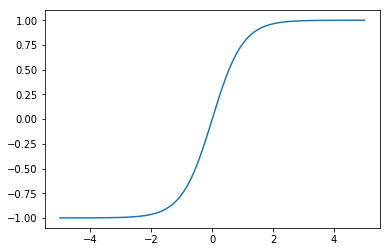

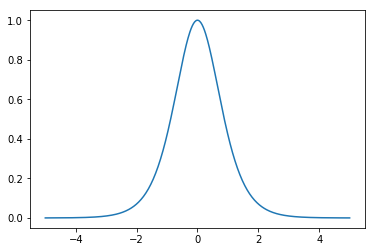

In [16]:
# Experimental: Yield the approximation of the derivative of function f at point x
def get_derivative(f, x, offset = 0.01):
    
    # Define points between which derivative is approximated
    vec1 = np.array([x - offset, f(x - offset)])
    vec2 = np.array([x + offset, f(x + offset)])
    
    # Get the vector between the two points
    sub = vec2 - vec1
    
    # Return the slope (rise over run echoes in your head)
    return sub[1]/sub[0]


activation = tanh
# Method used for mapping multiple values to the get_derivative method.
def test_approximation(x):
    return get_derivative(activation, x)

line = np.linspace(-5, 5, num = 500)

plt.plot(line, list(map(activation, line)))
plt.show()
plt.plot(line, list(map(test_approximation, line)))
plt.show()

In [30]:
def radial_basis_function(x, y, sig):
    return np.exp(-np.power((np.abs(x - y) * sig), 2))

In [53]:
for i in range(100):
    print(radial_basis_function(np.array([0, 0]), np.array([i, i]), 0.01))

[           1.000            1.000]
[           1.000            1.000]
[           1.000            1.000]
[           0.999            0.999]
[           0.998            0.998]
[           0.998            0.998]
[           0.996            0.996]
[           0.995            0.995]
[           0.994            0.994]
[           0.992            0.992]
[           0.990            0.990]
[           0.988            0.988]
[           0.986            0.986]
[           0.983            0.983]
[           0.981            0.981]
[           0.978            0.978]
[           0.975            0.975]
[           0.972            0.972]
[           0.968            0.968]
[           0.965            0.965]
[           0.961            0.961]
[           0.957            0.957]
[           0.953            0.953]
[           0.948            0.948]
[           0.944            0.944]
[           0.939            0.939]
[           0.935            0.935]
[           0.930           

# Loss functions

In [17]:
def MSE(y_p, y_t):
    
    
    error = np.square(y_p - y_t) * 1/(2 * len(y_p))
    
    d_error = 2 * (y_p - y_t) * 1/len(y_p)
        
    return np.nan_to_num(error), np.nan_to_num(d_error)

#def meta_cluster():

MSE(np.array([1, 1]), np.array([2, 3]))

(array([           0.250,            1.000]),
 array([          -1.000,           -2.000]))

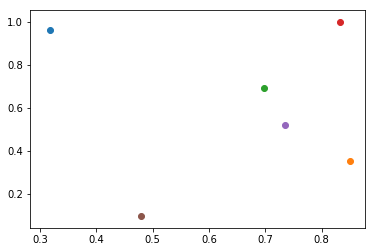

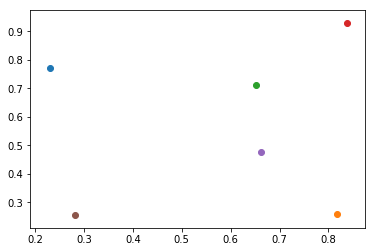

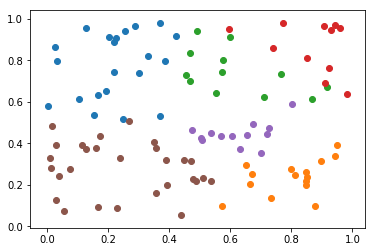

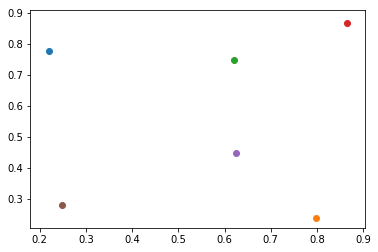

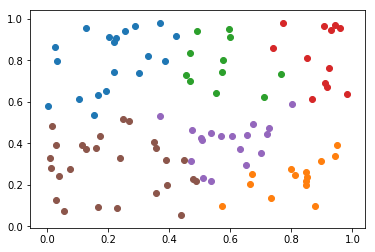

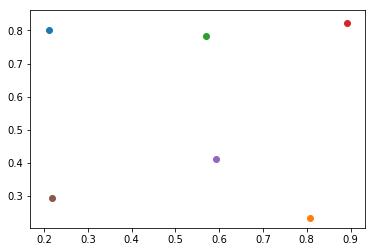

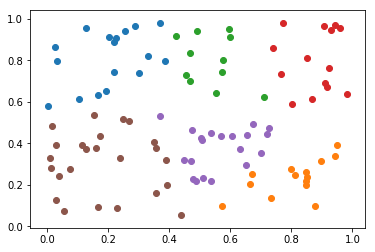

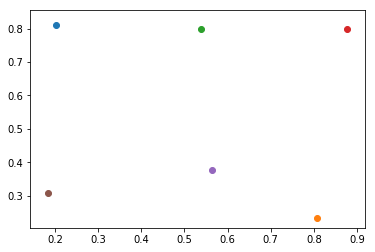

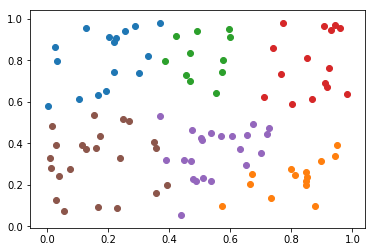

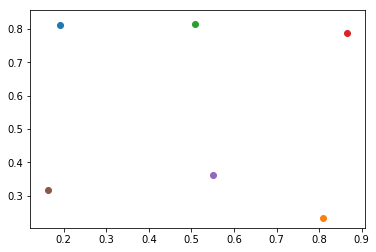

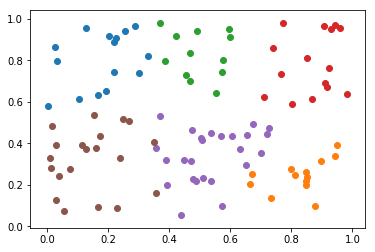

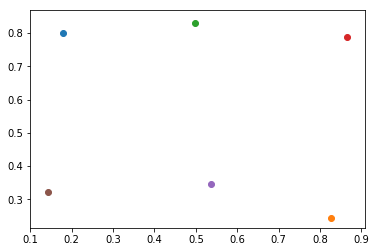

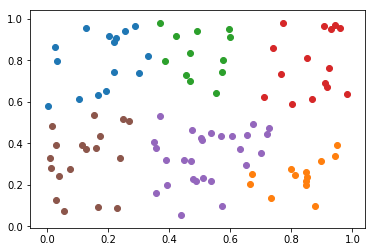

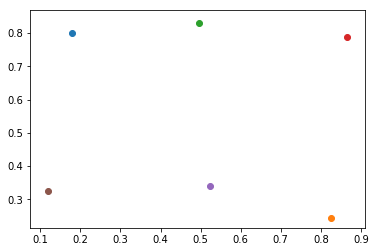

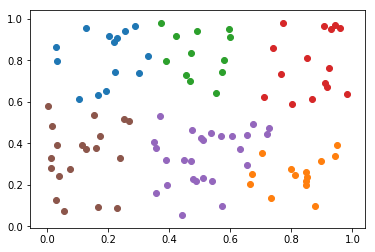

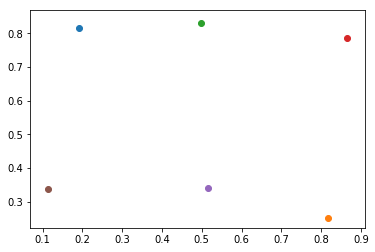

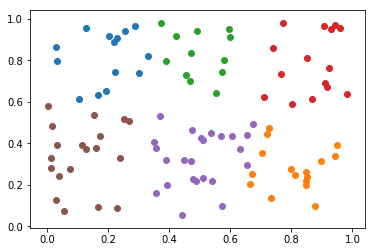

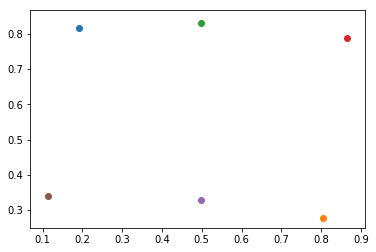

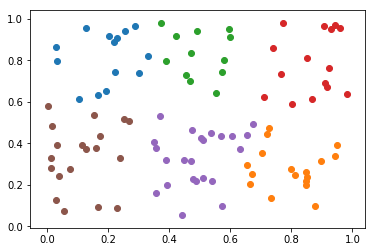

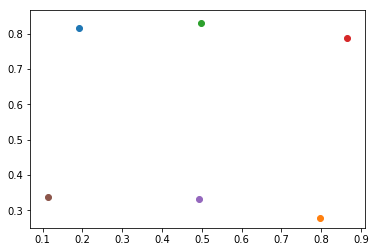

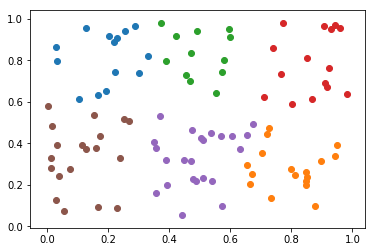

In [20]:
def k_means(clusters, points, iters = 10):
    
    for i in range(iters):
        
        cluster_points = get_cluster_belonging(clusters, points)

        for c in range(len(clusters)):

            clusters[c] = np.mean(cluster_points[c], axis = 0)
    
    return clusters

def get_cluster_belonging(clusters, points):
    cluster_points = [[] for i in range(len(clusters))]
    for e in points:

        minimum_distance = None

        cluster_dists = []

        for cluster in clusters:

            dist = np.sqrt(np.sum(np.power(cluster - e, 2)))

            cluster_dists.append(dist)

        index = np.argmin(cluster_dists)

        cluster_points[index].append(e)
        
    return cluster_points


points = np.random.random_sample((100, 2))
            
clusters = np.random.random_sample((6, 2))



for c in clusters:
    plt.scatter(c[0], c[1])
plt.show()
    
for i in range(10):
    k_means(clusters, points, iters = 1)

    for c in clusters:
        plt.scatter(c[0], c[1])
    plt.show()


    point_array = get_cluster_belonging(clusters, points)
    for c in point_array:
        plt.scatter(np.array(c).T[0], np.array(c).T[1])
    plt.show()





# Layer classes


In [21]:
# Super class of layers
class Layer(object):
    
    def __init__(self):
        
        self.signal = None
        self.derivative = None
        self.error = None
        self.gradient = []
        self.activation = identity
        
    def get_params(self):
        return None
        
    
class graph:
    
    def __init__(self, size, activation = identity, iters = 2, W = None):
        
        if W == None:
            size = (size, size + 1)
            self.W = np.random.random_sample(size) - 0.5
        else:
            self.W = W
        
        self.activation = activation
        self.iters = iters
    
    def get_params(self):
        return self.W
    
    def feed_forward(self, inp, train = True):
        
        self.signal = inp
        for i in range(self.iters):
            # Append bias
            inp = np.append(inp, 1)
            inp = self.activation(self.W.dot(inp))
        
        return inp
    
        
class scaling(Layer):
    def __init__(self, scalar = None):
        
        self.scalar = scalar
        
    def get_params(self):
        return self.scalar
    
    def feed_forward(self, inp, train = True):
            
        self.signal = inp
        if self.scalar == None:
            return inp * 1/np.max(np.abs(inp))
            
        return inp * self.scalar
    
    
class dropout:
    
    def __init__(self, rate = 0.1):
        
        self.rate = rate
        
    def get_params(self):
        return self.rate   
    
    def feed_forward(self, inp, train = True):
        
        self.signal = inp
        
        if train == False:
            # Only drop on train
            return inp
    
        mask = np.random.random_sample(inp.shape)
        
        mask = np.where(mask > self.rate, 1, 0)
        
        return np.multiply(inp, mask)


    
class fullyConnected(Layer):
    def __init__(self, size, activation = identity, W = None):
        
        if W == None:
            size = (size[0], size[1]+1)
            self.W = np.random.random_sample(size) - 0.5
        else:
            self.W = W
        
        self.activation = activation
        
        self.gradients = []
    
    def approximate_derivative(self, x):
        return get_derivative(self.activation, x)
    
    def get_params(self):
        return self.W
    
    def feed_forward(self, inp, train = True):
        
        # Append bias
        inp = np.append(inp, 1)
        
        self.signal = inp
        
        if train:
            self.derivative = list(map(self.approximate_derivative, self.W.dot(inp)))
            self.derivative = np.array(self.derivative).T
        
        return self.activation(self.W.dot(inp))
    
    
    def compute_gradient(self, err, prev_input):
        
        
        error = err.reshape(len(err), 1) * self.W

        error = error * self.derivative.reshape(len(self.derivative), 1)
        error = np.sum(error, axis = 0)
        
        # Remove error of bias node
        error = error[:-1]
        #print("e1", error.shape, prev_input.shape)
        
        # Reshape prev_input to allow for dot product
        prev_input = prev_input.reshape(1, len(prev_input))
        
        # Error reshape is done here, it must not have the reshape when returning it!
        # Only the gradient requires this shape of error
        gradient =  error.reshape(len(error), 1).dot(prev_input)
        
        return (error, gradient)
        
    def update(self, alpha):
        
        for gradient in self.gradients:
            self.W -= alpha * gradient * 1/len(self.gradients)
            
        # Remember to reset gradient after update
        self.gradients = []

In [22]:
class Model:
    
    def __init__(self, layers = None):
        
        if layers == None:
            self.layers = []
            
        else:
            self.layers = layers
            
        self.history = {
            "error" : [],
            "acc" : []
        }
        
    def add(self, layer):
        
        self.layers.append(layer)
    
    # Admin methods (training algorithm, optimization)
    
    # Feed forward, save the derivatives and such
    def compute(self, x):
        
        for layer in self.layers:
            x = layer.feed_forward(x, train = True)
        return x
        
    
    def compute_gradient(self, x, y):
        
        gradient = None
        
        pred = self.compute(x)
        
        # Compute Error
        out_derivative = self.layers[-1].derivative
        Error, error_derivative = MSE(pred, y)
        #print("Error:",Error)
        # Calculate gradient
        
        # First step
        
        error = error_derivative #* out_derivative

        # signal is the input signal of the layer, we propagate backwards now
        signal_n = self.layers[-1].signal
        gradient = error.reshape(len(error), 1) * signal_n.reshape(1, len(signal_n))
        self.layers[-1].gradients.append(gradient)

        # Second step, continuing backwards through the complete structure
        for i in reversed(range(1, len(self.layers))):
            
            # Sanity check variables
            layer = self.layers[i]
            prev_signal = self.layers[i-1].signal
            
            # Use specified method for computing the gradient
            error, gradient = layer.compute_gradient(error, prev_signal)
            self.layers[i-1].gradients.append(gradient)
        return Error
        
    def update_layers(self, alpha = 0.0003):
        
        for layer in self.layers:
            layer.update(alpha)
    
    
    # Train on batch x with labels y, this runs for one epoch. Both inputs must be iterables!
    def batch_update(self, x, y, alpha = 0.0003):
        
        
        errors = []
        
        # For all examples in batch
        for i in range(len(x)):
            
            e = self.compute_gradient(x[i], y[i])
            
            # Store statistics of the batch
            errors.append(e)

        
        # Update the layers once the gradients have been stored
        self.update_layers(alpha)
        
        return errors
        
    def train(self, x, y, epochs = 3, batch_size = 1, alpha = 0.0003, shuffle = True):
        
        
        for e in range(epochs):
            #print("epoch:", e)
            index = 0
            errors = []
            
            # Shuffle the dataset
            if shuffle:
                
                shuffle_index = np.random.shuffle(np.arange(len(x)))
                
                x = x[shuffle_index][0]
                y = y[shuffle_index][0]
                
            
            while index < len(x):
                batch_examples = x[index : index + batch_size]
                batch_labels = y[index : index + batch_size]
                
                errors.append(self.batch_update(batch_examples, batch_labels, alpha))
                
                index = index + batch_size
            
            #errors = np.array(errors)
            #self.history["error"].append(np.mean(errors))
                
            
        
        
    # End-user methods
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.feed_forward(x, train = False)
        return x

    
    
np.random.seed(0)
model = Model()
inp_size = 50
model.add(fullyConnected((1, inp_size), activation = relu))
#model.add(fullyConnected((10, 10), activation = sine))
#model.add(fullyConnected((10, 6), activation = relu))
#model.add(scaling())
#model.add(dropout(rate = 0.2))
#model.add(graph(6, activation = tanh, iters = 3))
#model.add(fullyConnected((1, 10), activation = relu))




In [57]:
x = np.multiply(np.random.random_sample((300, inp_size)), np.random.random_integers(0, 5))
y = np.sum(x, axis = 1)
print(x[0].shape, y[0])

model.train(x, y, alpha = 0.003, batch_size= 50, epochs = 10)

for i, j in zip(x, y):
    p = model.predict(i)
    print(p, j, (p-j) * (p-j))

"""
errors = []
for i in range(len(x)):
    pred = model.predict(x[i])
    #print("Model, out_signal:", model.layers[-1].W.dot(np.append(x, 1)))
    print("pred:", pred)
    print("True_", y[i])
    if sum(pred) == 0:
        print(model.layers[-1].gradients)
    
    errors.append(np.sum(model.compute_gradient(x[i], y[i])))
    model.update_layers(alpha = 0.003)
    print()
    #print(model.layers[-1].gradients)
print(np.argmin(errors))
print(y[0])

plt.plot(errors)

plt.show()
"""

c:\users\joels\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
  """Entry point for launching an IPython kernel.


(50,) 102.4437390192653
epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
[         106.186] 102.4437390192653 [          14.007]
[         146.211] 143.67196836983342 [           6.448]
[         121.558] 118.53880650503724 [           9.114]
[         119.121] 115.3337731257047 [          14.344]
[         143.575] 142.45601682578626 [           1.252]
[         103.978] 102.85146688829762 [           1.268]
[         136.497] 131.0007831395392 [          30.204]
[         122.460] 119.22681516369498 [          10.453]
[         135.406] 130.18037533365327 [          27.308]
[         122.071] 120.85865757917529 [           1.470]
[         134.423] 131.57698539868335 [           8.102]
[         129.615] 129.631565936476 [           0.000]
[         117.675] 114.12102276311249 [          12.633]
[         110.773] 110.32911266754137 [           0.197]
[         126.233] 122.33527864301332 [          15.189]
[         133.074] 127.6938955092620

'\nerrors = []\nfor i in range(len(x)):\n    pred = model.predict(x[i])\n    #print("Model, out_signal:", model.layers[-1].W.dot(np.append(x, 1)))\n    print("pred:", pred)\n    print("True_", y[i])\n    if sum(pred) == 0:\n        print(model.layers[-1].gradients)\n    \n    errors.append(np.sum(model.compute_gradient(x[i], y[i])))\n    model.update_layers(alpha = 0.003)\n    print()\n    #print(model.layers[-1].gradients)\nprint(np.argmin(errors))\nprint(y[0])\n\nplt.plot(errors)\n\nplt.show()\n'

In [65]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive']
# Encode all points to the latent representation
def get_latent_space(model, points):
    
    latent_space = []
    
    for p in points:

        latent_space.append(model.predict(p))

    return np.array(latent_space)
    
# Get cluster centres   
def compute_clusters(labels, space):
    
    clusters = []
    num_clusters = len(np.unique(labels))

    if len(clusters) == 0:
        rang = np.arange(len(space))
        np.random.shuffle(rang)

        # Make each cluster the center of all generated points
        for lab in np.unique(labels):

            # Get the points belonging to the label
            labeled_points = space[labels == lab]

            # Take the mean of them and make that the cluster center
            clusters.append(np.mean(labeled_points, axis = 0))
    
    return clusters

def plot_clusters(clusters, colors):
    
    for cluster, color in zip(clusters, colors):
        plt.scatter(cluster[0], cluster[1], color = color)
        
    plt.show()
    
def plot_clasified_points(model, points, labels, colors):
    
    # Calculate latent representation
    latent_space = get_latent_space(model, points)
    
    for lab, color in zip(np.unique(labels), colors):

            # Get the points belonging to the label
        labeled_points = latent_space[labels == lab]

            # plot them
        plt.scatter(labeled_points.T[0], labeled_points.T[1], color = color)

    plt.show()

# Move clusters according to the separation formula
def separate_clusters(clusters, alpha = 5):
    
    moved_clusters = []

    for cluster in clusters:

        movement_sum = 0
        for other_cluster in clusters:

            #dist = alpha * 1/(cluster - other_cluster)
            dist = radial_basis_function(cluster, other_cluster, alpha)*5
            dist[dist == np.Inf] = 0
            movement_sum += dist

        #print(cluster, movement_sum)
        movement_sum = cluster + movement_sum

        moved_clusters.append(movement_sum)


    return np.array(moved_clusters)


In [66]:
# Create data points
size = 100
points = np.random.random_sample((size, 5))
labels = np.random.randint(3, size = size)

print(points[0])

[           0.412            0.675            0.250            0.313            0.965]


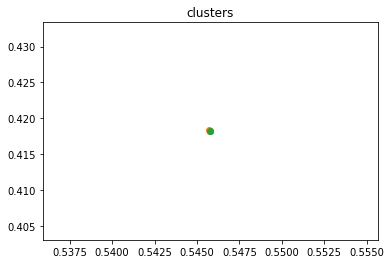

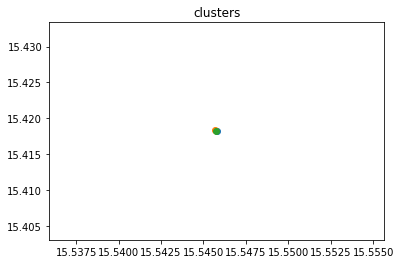

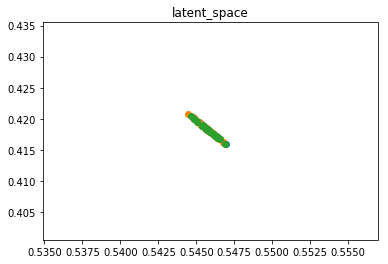

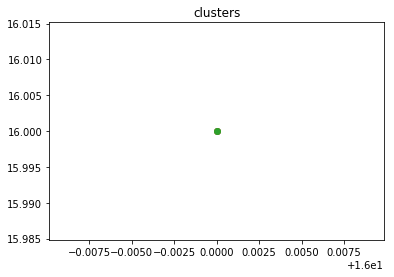

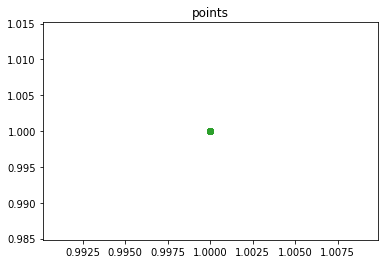

In [69]:
# Make the model
np.random.seed(0)
model = Model()
model.add(fullyConnected((4, 5), activation = sigmoid))
model.add(fullyConnected((3, 4), activation = sigmoid))
model.add(fullyConnected((2, 3), activation = sigmoid))

latent_space = get_latent_space(model, points)

clusters = compute_clusters(labels, latent_space)

plt.title("clusters")
plot_clusters(clusters, colors)

cluster_alpha = 0.000001
clusters = separate_clusters(clusters, alpha = cluster_alpha)

plt.title("clusters")
plot_clusters(clusters, colors)

plt.title("latent_space")
plot_clasified_points(model, points, labels, colors)


for i in range(5):
    
    
    clusters = compute_clusters(labels, latent_space)

    clusters = separate_clusters(clusters, alpha = cluster_alpha)
    
    # List of clusters such that the cluster corresponds with the labels
    clusters_ordered = [clusters[y] for y in labels]

    errors = model.train(points, clusters_ordered, epochs = 200, alpha = 0.0003, batch_size= 32, shuffle=False)
    #plot_clasified_points(model, points, labels, colors)
    latent_space = get_latent_space(model, points)

    
plt.title("clusters")
plot_clusters(clusters, colors)
plt.title("points")
plot_clasified_points(model, points, labels, colors)
    

In [62]:
model = Model()
model.add(Connected_layer((3, 5), activation = tanh))
model.add(Connected_layer((2, 3), activation = tanh))
clusters = []
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive']

# Encode all points to the latent representation
latent_space = []
for p in points:
    
    latent_space.append(model.predict(p))
    
latent_space = np.array(latent_space)

# Get cluster centres (if they dont already exist)
num_clusters = len(np.unique(labels))
    
if len(clusters) == 0:
    rang = np.arange(len(latent_space))
    np.random.shuffle(rang)

    # Make each cluster the center of all generated points
    for lab, color in zip(np.unique(labels), colors):
        
        # Get the points belonging to the label
        labeled_points = latent_space[labels == lab]

        # Take the mean of them and make that the cluster center
        clusters.append(np.mean(labeled_points, axis = 0))
        
        # Scatter them for fun
        plt.scatter(labeled_points.T[0], labeled_points.T[1], color = color)

        
plt.show()
#for j in clusters:
#    plt.scatter(j[0], j[1])
    
#plt.show()
plt.title("initial cluster")
for cluster, color in zip(clusters, colors):
    plt.scatter(cluster[0], cluster[1], color = color)
plt.show()

# Move clusters according to the separation formula
alpha = 5
sums = []

for cluster in clusters:
    
    movement_sum = 0
    for other_cluster in clusters:
        
        dist = alpha * (cluster - other_cluster)
        dist[dist == np.Inf] = 0
        movement_sum += dist
        
    print(cluster, movement_sum)
    movement_sum = cluster + movement_sum
    
    sums.append(movement_sum)

    

clusters = np.array(sums)

plt.title("initial cluster")
for cluster, color in zip(clusters, colors):
    plt.scatter(cluster[0], cluster[1], color = color)
plt.show()

print(clusters)
# Show initial clustering
point_array = get_cluster_belonging(clusters, latent_space)
print("initial")
i = 0
for c, color in zip(point_array, colors):
    if len(c) > 0:
        plt.scatter(np.array(c).T[0], np.array(c).T[1], color = color)
plt.show()

print("####TRAINING####")
# Now, how to update the model?

clusters_ordered = [clusters[y] for y in labels]
for i in range(50):
    
    clusters = []
    # Make each cluster the center of all generated points
    for lab, color in zip(np.unique(labels), colors):
        
        # Get the points belonging to the label
        labeled_points = latent_space[labels == lab]

        # Take the mean of them and make that the cluster center
        clusters.append(np.mean(labeled_points, axis = 0))
        
        # Scatter them for fun
        #plt.scatter(labeled_points.T[0], labeled_points.T[1], color = color)
    
    sums = []

    for cluster in clusters:

        movement_sum = 0
        for other_cluster in clusters:

            dist = alpha * (cluster - other_cluster)
            dist[dist == np.Inf] = 0
            movement_sum += dist

        print(cluster, movement_sum)
        movement_sum = cluster + movement_sum

        sums.append(movement_sum)



    clusters = np.array(sums)
    
    for epochs in range(40):
        
        
        errors = model.batch_update(points, clusters_ordered, alpha = 0.03)
        
    #print(errors)
        #for x, y in zip(points, labels):

            

    latent_space = []
    # Show initial clustering
    for p in points:
    
        latent_space.append(model.predict(p))
    
    latent_space = np.array(latent_space)
    
    point_array = get_cluster_belonging(clusters, latent_space)
    print("Epoch", i)
    i = 0
    for c, color in zip(point_array, colors):
        if len(c) > 0:
            plt.scatter(np.array(c).T[0], np.array(c).T[1], color = color)
    plt.show()
    

    


NameError: name 'Connected_layer' is not defined

Latent Space:


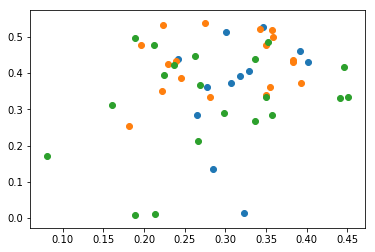

In [172]:
print("Latent Space:")
plot_clasified_points(model, points, labels, colors)

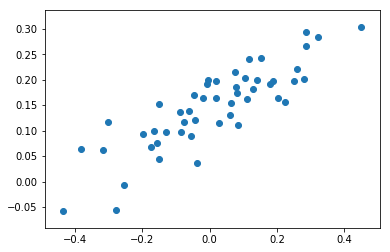

In [116]:
plt.scatter(np.array(latent_space).T[0], np.array(latent_space).T[1])
plt.show()

In [117]:
def one_hot_encode(x, num_classes = 6):
    ret = []
    for i in x:
        arr = [0 for i in range(num_classes)]
        arr[i] = 1
        ret.append(np.array(arr))
    ret = np.array(ret)
    return ret
encoded_labels = one_hot_encode(labels, num_classes = 3)

In [63]:
encoded_labels

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [165]:
model = Model()
model.add(Connected_layer((4, 5), activation = tanh))
#model.add(Connected_layer((10, 10), activation = tanh))
model.add(Connected_layer((3, 4), activation = tanh))

model.train(points, encoded_labels, epochs=300, alpha = 0.007, batch_size= 16, shuffle=True)

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50
epoch: 51
epoch: 52
epoch: 53
epoch: 54
epoch: 55
epoch: 56
epoch: 57
epoch: 58
epoch: 59
epoch: 60
epoch: 61
epoch: 62
epoch: 63
epoch: 64
epoch: 65
epoch: 66
epoch: 67
epoch: 68
epoch: 69
epoch: 70
epoch: 71
epoch: 72
epoch: 73
epoch: 74
epoch: 75
epoch: 76
epoch: 77
epoch: 78
epoch: 79
epoch: 80
epoch: 81
epoch: 82
epoch: 83
epoch: 84
epoch: 85
epoch: 86
epoch: 87
epoch: 88
epoch: 89
epoch: 90
epoch: 91
epoch: 92
epoch: 93
epoch: 94
epoch: 95
epoch: 96
epoch: 97
epoch: 98
epoch: 99
epoch: 100

In [166]:
acc = 0
for p, l in zip(points, labels):

    pred = model.predict(p)
    
    if np.argmax(pred) == l: 
        acc += 1

        
print(acc/ len(points))

0.46
